In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Oxford Martin School Webcam - Broad Street, Oxford
# https://www.youtube.com/watch?v=St7aTfoIdYQ
capture = cv2.VideoCapture('video1.mp4')
length = int(capture.get(cv2.CAP_PROP_FRAME_COUNT))

output = np.zeros((int(capture.get(cv2.CAP_PROP_FRAME_HEIGHT)),int(capture.get(cv2.CAP_PROP_FRAME_WIDTH))), np.uint8)


In [3]:
backgroun_subtractor = cv2.createBackgroundSubtractorMOG2()

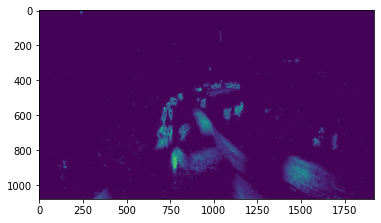

In [4]:
for i in range(120):
    ret, frame = capture.read()
    filter = backgroun_subtractor.apply(frame)
    cv2.imwrite('./frame.jpg', frame)
    cv2.imwrite('./diff-bkgnd-frame.jpg', filter)

    ret, th = cv2.threshold(filter, 2, 2, cv2.THRESH_BINARY)
    output = cv2.add(output, th)
    cv2.imwrite('./mask.jpg', output)

mask = plt.imread('./mask.jpg')
plt.imshow(mask)

